# Sklearn Tutorial

This notebook was created durring the Spring semester of 2021 while doing research funded by XSEDE. 
This notebook in particular was a simplified and cleaned up version of our research source code that can be used as a template for learning the framework. We will also look into other python libraries like pandas and pickle 
### Goal:
In this notebook we will be using astronomical data from pulsars. The goal is to create a model that can accuratly predict if the data collected is from a pulsar or from Radio Frequency Interference (RFI). In machine learning, this is reffered to as a classification problem where we have input variables and need to group them into different classes. In this case, we have 2 classes: Pulsars and RFI.
<br>
Pictures of Pulsars:
<br>
<img src="notebook_data/pulsar_picture.jpg" style="height:200px">
<img src="notebook_data/pulsar_picture2.jpg" style="height:200px">

## Getting Current Working Directory
I've found that using local paths to files is a little buggy while using the pickles library. So, to aliviate the problem, we will use an absolute path by getting the current working directory and then joining that path to the local path when we load and save files. For more information on this you can read this article by [TutorialsPoint](https://www.tutorialspoint.com/python/os_getcwd.htm).

In [9]:
import os
here = os.getcwd()

## Pandas and the HTRU Dataset
Pandas is a Python library that provides helpful datastructures and functions to manipulate the data. The main structure is called a dataframe. The way we used this structure was basically a 2D array that holds our data. For more information on the Pandas library, check out [pandas documentation](https://pandas.pydata.org/docs/). It is also convention to import pandas as pd. This shorthand allows us to more quickly use pandas methods without having to type out 'pandas' every time we use it.
<br><br>
Now we need to load our dataset into a pandas dataframe. The dataset we will be using is the HTRU dataset. This is a clean dataset that has 8 input values and a class label for over 17,000 pieces of data. You can find and download the set [here](https://www.kaggle.com/charitarth/pulsar-dataset-htru2). However, it is also provided in this repository saved as a csv file. The folks that created this open-source dataset requested any work that uses it provides the following citation: 
<br><br>
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
<br>	&emsp; Candidate Selection: From simple filters to a new principled real-time classification approach
<br>	&emsp; MNRAS, 2016.

<br>
For more information on the dataset, you can also check out the detailed documentation I found on [their website](https://archive.ics.uci.edu/ml/datasets/HTRU2). This is also provided in this repository under htru_citation.txt.

In [10]:
import pandas as pd 

# pandas .read_csv() method saves a csv file into a pandas dataframe
data_frame = pd.read_csv(os.path.join(here, 'HTRU_2.csv'))

# .head() lets us look at the structure of the dataframe and the first 5 rows
data_frame.head() 

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


## Missing Column Headers
Notice that there are no column labels in the current dataframe. It bassically used the first piece of data as the column headers. We need to update the column headers with more useful headers. As described by the dataset creaters, the following are what each column corrisponds to:

<ol>
    <li>Mean of integrated profile</li>
	<li>Standard deviation of the integrated profile</li>
	<li>Excess kurtosis of the integrated profile</li>
	<li>Skewness of the integrated profile</li>
	<li>Mean of the DM-SNR curve</li>
	<li>Standard deviation of the DM-SNR curve</li>
	<li>Excess kurtosis of the DM-SNR curve</li>
	<li>Skewness of the DM-SNR curve</li>
	<li>Class</li>
</ol>
So, we will update the column headers of our data frame to better represent the above.

In [11]:
data_frame.columns =['Mean of Int. Prof.', 'Stand. Deviation of Int. Prof.', 
                     'Excess Kurtosis of Int. Prof.', 'Skewness of Int. Prof.',
                     'Mean of Curve', ' Stand. Deviation of Curve', 'Excess Kurtosis of Curve',
                     'Skewness of Curve', 'Class']

# Now that we added column headers lets look at the header
data_frame.head()

,Mean of Int. Prof.,Stand. Deviation of Int. Prof.,Excess Kurtosis of Int. Prof.,Skewness of Int. Prof.,Mean of Curve,Stand. Deviation of Curve,Excess Kurtosis of Curve,Skewness of Curve,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


## Looking Closer at Our Data
Now that we have imported our data and cleaned up the column headers, we need to make sure the dataset itself is clean. The two things we need to check for are duplicates in the data and holes in our data. There are a few helpful methods in the pandas library that will help us check our dataset very easily. Let's start by checking the shape of our dataframe using pandas .shape. This will tell us how many objects there are in the dataset and how many attributes each object has.

In [12]:
data_frame.shape

(17897, 9)

As seen above, our dataframe has 17,897 different objects that are either pulsars or RFI. And each object has 9 attributes which would be the 8 attributes plus the class label. 
<br>
Now, let's make sure that there are no duplicates in the data. We will do this by using the pandas method [.drop_duplicates().](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) We can then check the shape again to see if any duplicates were found.

In [16]:
print('Before dropping duplicates: ' + str(data_frame.shape))
data_frame = data_frame.drop_duplicates()
print('After dropping duplicates:  ' + str(data_frame.shape))

Before dropping duplicates: (17897, 9)
After dropping duplicates:  (17897, 9)


As you can see, there was no change in the number of objects in the data frame. This means there were no duplicates found in the dataset. If you do come accross a dataset that has duplicates, it is important to drop them so your model will not be biased towards those objects.
<br>
Next, let's check for fields with missing data. for this, we will use the [.isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) method that will flag the objects with missing data by creating a boolean data frame marking which elements are missing. We will then use the [.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function to count up the number of missing data in each column and display the totals for each column.

In [19]:
data_frame.isnull().sum() 

Mean of Int. Prof.                0
Stand. Deviation of Int. Prof.    0
Excess Kurtosis of Int. Prof.     0
Skewness of Int. Prof.            0
Mean of Curve                     0
 Stand. Deviation of Curve        0
Excess Kurtosis of Curve          0
Skewness of Curve                 0
Class                             0
dtype: int64

Since all of the columns have no missing data, we can safely move forward with this dataset. If you do run into a dataset that has missing data you can use panda method [.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna).

## Distribution of Data
Lets look at the distribution of our data between the two classes (pulsars vs non-pulsars). To do this, I made a dataframe that has all the pulsars in it and a data frame with the non pulsars in it. From there, if you just take the length of both, you can print the distribution.

In [20]:
# To break down what is done in these 2 lines
# data_frame[data_frame.Class == 0] returns
# a dataframe including all of the rows with a class 0
# len simply returns the length of such a dataframe

# a class of 0 is non pulsar and 1 is pulsar
print('Number of Non-Pulsars: ' + str(len(data_frame[data_frame.Class == 0])))
print('Number of Pulsars:     ' + str(len(data_frame[data_frame.Class == 1])))
print('Ratio of Pulsars: ' + str(1639/(16258+1639)))


Number of Non-Pulsars: 16258
Number of Pulsars:     1639
Ratio of Pulsars: 0.09157959434542103


Here is a pie chart to better visualize the data:
<br>
<img src='notebook_data/pie_chart1.png'>
<br>
There is obviously an inbalance here. Over 90% of the data is in one class. We need to be careful that this inbalance will not bias our model too much. This means the model will favor classifying any new data as RFI which will lead to more missed predictions of pulsars. 

## Creating Input and Output data frames
The next step in the process is to separate the inputs from the ouputs. In this case, columns 1-8 are inputs and the outputs are in the last column (Class). So, we need to save the first 8 columns into a separate data frame from the last column. We will label the input data frame as x and the output data frame as y.
<br>
To create the input data frame, we can use the pandas function [.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). The goal is to create a copy of our dataframe and drop the last column. 
<br>
To create the output data frame, we can use the pandas function [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to access the Class column and save it to y.

In [30]:
# axis 1 represents the columns (obviously axis 0 will represent the rows)
# inplace determines whether or not what is returned is a modified copy or 
# if the operation is done on the original dataframe
# since we want to save a modified copy we set inplace=False
x = data_frame.drop(['Class'], axis=1, inplace=False)

# Now let's grab the class column for our output vector
# the first parameter controls which rows we want, and the second controls the columns we want
# in our case, we want all the rows and the Class column
y = data_frame.loc[:, ['Class']]

# Let's look at the shape and see if they match our expectations
print(x.shape)
print(y.shape)

(17897, 8)
(17897, 1)


Just to double check our work, let's look at the heads of each data frame to see what these operations did. As you can see below, x has all of the input columns and y has the output columns as we expected.

In [28]:
x.head()

,Mean of Int. Prof.,Stand. Deviation of Int. Prof.,Excess Kurtosis of Int. Prof.,Skewness of Int. Prof.,Mean of Curve,Stand. Deviation of Curve,Excess Kurtosis of Curve,Skewness of Curve
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004


In [29]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Separate Data Into Testing and Training Sets
The next step is to separate our data into a training set and a testing set. This way we can train our model and then test the accuracy based on new data (data the model hasn't seen yet). This practice will help us get more acurate representation of how the model will act on new data. 
<br>
Sklearn has a function [.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that splits the data frames for us. The method returns 4 data frames in total: training inputs, testing inputs, training outputs and testing outputs. The parameter test_size determines what percentage of the dataframe is used for testing. In our case we used 20% for testing. This leaves 80% of our data to train off of. The parameter random_state is the seed for the sudo-random number generator for shuffling data. The documentation said 42 was a common seed to use so we will use that.

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Let's look at the size of the different dataframes to see what the function did
print((x_train.size)//8) # divide by 8 because there are 8 columns (// is integer division in python)
print(y_train.size)
print((x_test.size)//8) # divide by 8 because there are 8 columns
print(y_test.size)

14317
14317
3580
3580


Let's make sure that the test and training sets contain a similar ratio of pulsars to non pulsars.

In [38]:
non_pulsar_train = len(y_train[y_train.Class == 0])
pulsar_train = len(y_train[y_train.Class == 1])
percent_pusar_train = pulsar_train/(non_pulsar_train+pulsar_train)

non_pulsar_test = len(y_test[y_test.Class == 0])
pulsar_test = len(y_test[y_test.Class == 1])
percent_pusar_test = pulsar_test/(non_pulsar_test+pulsar_test)

print("TRAINING SET STATS:")
print('Number of Non-Pulsars=' + str(non_pulsar_train))
print('Number of Pulsars=' + str(pulsar_train))
print('Ratio of Pulsars=' + str(percent_pusar_train))
print('\nTESTING SET STATS:')
print('Number of Non-Pulsars=' + str(non_pulsar_test))
print('Number of Pulsars=' + str(pulsar_test))
print('Ratio of Pulsars=' + str(percent_pusar_test))

TRAINING SET STATS:
Number of Non-Pulsars=12999
Number of Pulsars=1318
Ratio of Pulsars=0.09205839212125445

TESTING SET STATS:
Number of Non-Pulsars=3259
Number of Pulsars=321
Ratio of Pulsars=0.08966480446927375


Pie charts to help with visualization (numbers will slightly vary from pie charts depending on the random split):
<br>
<img src ='notebook_data/pie_chart2.png'> <img src='notebook_data/pie_chart3.png'>

<br>
Both have a good distribution which are very close to each other and close to the original dataset's distribution.

## Model Metrics
We will be using 3 different metrics to gauge the effectiveness of our models. All three are from the [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) library. The first metric is the accuracy score. This simply will give use the percentage of correct predictions our model made. This alone will not be enough to get a full idea of how accurate our model is. For example, if our model predicts RFI every time, it will be around 90% accurate. 90% sounds like a great performance, but is not a useful model. To try and get a better idea of how our model is predicting, we will also use the confusion matrix which gives us the number of each catagoriy (true positive, false positive, false negative and true negative). Another metric we will use is the f1 score which basically calculates the recall and precision and gives a score based on that (this tells us more than just the accuracy score alone).

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Choosing a Model
The sklearn library provides a ton of different models to train. In this notebook, we will only focus on an MLP Classifier [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) (Bassically a feed forward neural network). However, if you wanted to try some of the other classifiers in the sklearn library, the process would be very similar. So, first we need to import the type of model we want to use, then set the parameters. In this example, we are only changing the number and size of the hidden layers. We are leaving all of the other variables default. 

In [40]:
from sklearn.neural_network import MLPClassifier

# This is 3 hidden layers of 10 hidden nodes each
neural_network = MLPClassifier(hidden_layer_sizes=(10,10,10))

## Training a Model
Once you create a model object, sklearn provides a single function to train all of their networks: [.fit](https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f). The two parameters are a dataframe of the inputs for training and the outputs. Note that the outputs must be a 1D array, so if you dont use .values.ravel() it will still work but it will throw an error because it is unsure that the data frame you provided is 1D (you can read [this thread](https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected) for more info). Also, keep in mind that both the inputs and the outputs need to have the same number of objects in them. Otherwise, this is a very simple line of code for the complex work that is going on in the background.

In [50]:
# This line trains the model using the input and output of the training sets we separated before
neural_network.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10))

## Predicting on Unseen Data and Performance Overview
Now that we have a trained model, lets see how it performs on our test data. To do this we use the sklearn [.predict method](https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f). The only parameter is the input data frame and it returns the predictions from the model. We can then use the model's predicted classifications and compare them to the actual classifications to gauge the performance of our model. We will be using accuarcy score, f1 score, and to make the confusion matrix easier to visualize, I actually made a matplotlib heatmap to show the confusion matrix.

Accuracy Score: 0.979050279329609
F1 Score: [0.98854787 0.87725041]


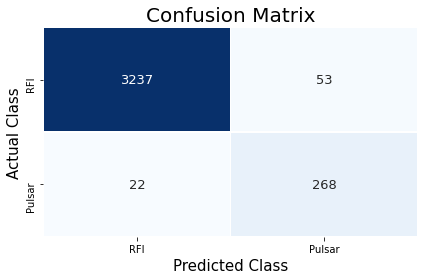

In [55]:
# Getting model predictions using the test input dataframe
y_predict = neural_network.predict(x_test)

# Accuracy Score
print("Accuracy Score:", end = " ")
print(accuracy_score(y_test, y_predict))

# F1 Score
print("F1 Score:", end =" ")
print(f1_score(y_test, y_predict, average=None))


# The rest of this block is the confusion matrix
# If you just want a quick confusion matrix just use the following line:
# confusion_matrix(y_predict, y_test)
from matplotlib import pyplot as plt
import seaborn as sns
plt.title("Confusion Matrix", fontsize=20)

palette = sns.set_palette('pastel')

sns.heatmap(confusion_matrix(y_predict, y_test),cbar=False,annot=True, annot_kws={'size': 13}, fmt="d", linewidth=.5, robust=True, xticklabels=['RFI','Pulsar'], yticklabels=['RFI', 'Pulsar'], cmap='Blues', vmax = 3225, vmin = 19)

plt.xlabel('Predicted Class', fontsize=15)
plt.ylabel('Actual Class', fontsize=15)
plt.tight_layout()

# Start here

In [15]:
# 97% accuracy is pretty good

# we can try other parameters to see if they do better
# It is almost impossible to try all combinations by hand
# there is a helpful method that lets us try different models 

# Grid search
from sklearn.model_selection import GridSearchCV

# Here we are comparing the 4 different values of activation and 3 different values for solver
# Gridsearch will compare all possible combinations of these and return the best
# The parameters are the model you want to use, a list of parameters you want to check, 
# cv and others you can look into
# cv=5 basically splits the test data into 5 different tests and then it takes the average to rank them
grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,10,10)),{
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}, cv=5, return_train_score=False)

grid_search.fit(x_train, y_train.values.ravel())


s\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nnull\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nnull\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(10, 10, 10)),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [16]:
# Easier to look at results if you save them to a dataframe (so we can manipulate the data with pandas mehtods)
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.596066,0.115624,0.002993,0.000894,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.981494,0.975209,0.980440,0.974502,0.977995,0.977928,0.002763,1
1,1.301678,1.364905,0.002821,0.000710,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.973464,0.907821,0.974153,0.970311,0.972057,0.959561,0.025903,11
2,1.100885,0.148681,0.002769,0.000300,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.978701,0.972067,0.974502,0.971708,0.977297,0.974855,0.002777,6
3,2.956254,0.393813,0.003860,0.000161,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.980447,0.971020,0.980440,0.974153,0.975201,0.976252,0.003689,2
4,0.644134,0.028657,0.003397,0.000349,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.907821,0.907821,0.908138,0.908138,0.907789,0.907942,0.000161,12


In [17]:
# this gives us a bunch of helpful data
# We can sort based on the rank of the different tests so it is in order of best to worst combinations
# by tells us which column value we want to sort by
# axis tells us which we are sorting (we want to sort the rows)
# ascending is self explanitory
grid_search_results = grid_search_results.sort_values(by=['rank_test_score'], axis=0, ascending=True)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.596066,0.115624,0.002993,0.000894,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.981494,0.975209,0.980440,0.974502,0.977995,0.977928,0.002763,1
3,2.956254,0.393813,0.003860,0.000161,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.980447,0.971020,0.980440,0.974153,0.975201,0.976252,0.003689,2
5,3.814097,0.661056,0.003260,0.000395,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.979399,0.974162,0.976947,0.974153,0.975899,0.976112,0.001959,3
11,3.236132,1.485711,0.002957,0.000633,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.979399,0.973115,0.976249,0.975899,0.973454,0.975623,0.002268,4
9,2.527177,0.211673,0.003866,0.001566,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.976257,0.973813,0.975550,0.974153,0.975201,0.974995,0.000900,5


In [18]:
# if you wanted to save this dataframe use the following
# you could use this to do further study on the results
grid_search_results.to_csv('tutorialGridSearch.csv', index=False)

In [19]:
# The last thing I want to look at in this tutorial is the library pickle
# This allows you to save trained models to your hard drive
# you can use this to save the best models that could be used for further use
import pickle

# this is just creating a file to write to and dumping the pickle
with open(os.path.join(here, 'tutorialGridsearch.pkl'), 'wb') as f:
    pickle.dump(neural_network, f)

In [20]:
# to load a pickle do the following
with open(os.path.join(here, 'tutorialGridsearch.pkl'), 'rb') as f:
    pickled_model = pickle.load(f)

In [21]:
# so directly from loading we can use it to predict again
y_predict = pickled_model.predict(x_test)

accuracy_score(y_test, y_predict)

0.9787709497206704